<a href="https://colab.research.google.com/github/PrajwalRaj21/Machine-Learning-With-Python/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Dataset Linear Regression**
In this project, I explored linear regression techniques using the Titanic dataset as part of the Free Code Camp Machine Learning course. The Titanic dataset provides valuable insights into passenger survival rates based on various features such as age, gender, ticket fare, and class. I implemented a linear regression model to predict survival probabilities and analyzed the impact of different variables on survival outcomes. This experience enhanced my understanding of regression analysis, model evaluation, and the practical application of machine learning concepts in a real-world context.

In [3]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
import pandas as pd

#loading dataset

dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')  #training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')  #testing data
dftrain.head()
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
print(dftrain.head())
print(dftrain.loc[0])


      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object


In [6]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [7]:
dftrain.shape

(627, 9)

627 entires with 9 features!

<Axes: >

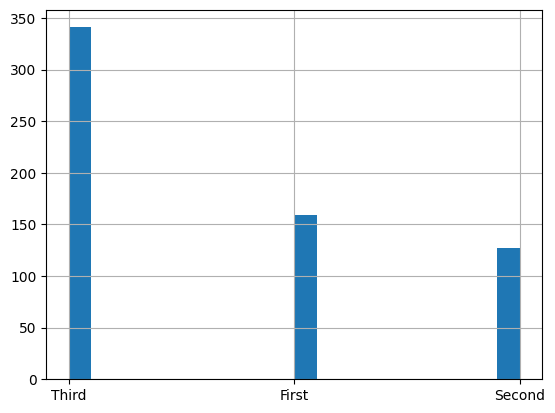

In [8]:
dftrain["class"].hist(bins=20)

<Axes: >

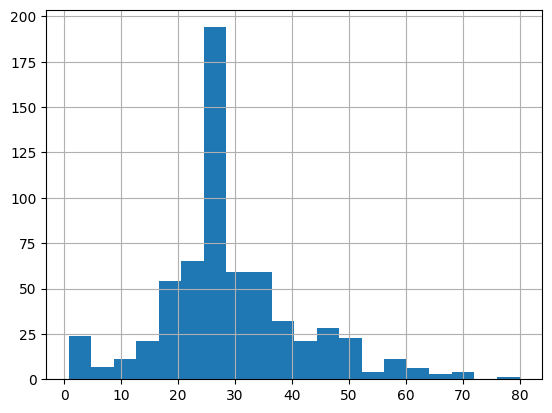

In [9]:
dftrain.age.hist(bins=20)

<Axes: ylabel='sex'>

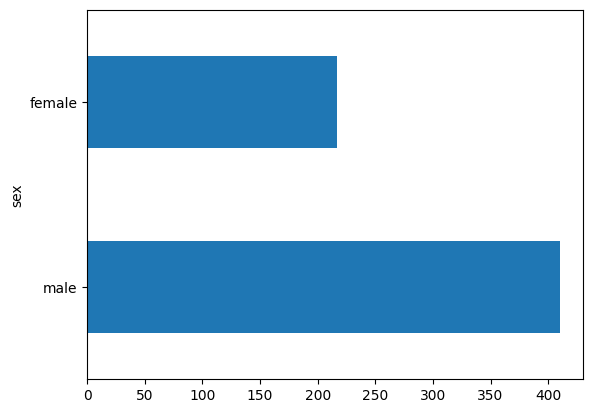

In [10]:
dftrain.sex.value_counts().plot(kind='barh')

<Axes: ylabel='class'>

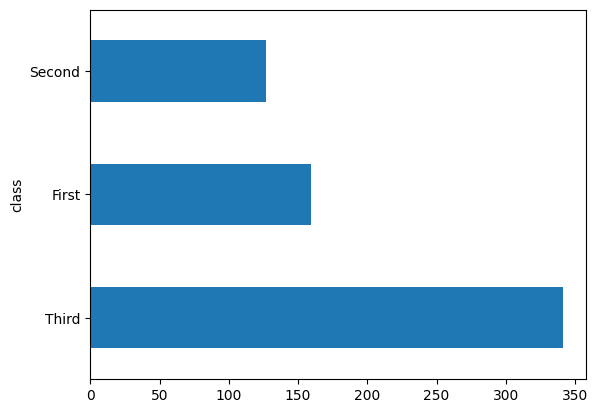

In [11]:
dftrain['class'].value_counts().plot(kind='barh')

# **Training vs Testing Data**

In [12]:
dfeval.shape

(264, 9)

In [13]:
CATEGORICAL_COLUMNS =['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [14]:
dftrain['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

# **The training Process**

In [15]:


def make_input_fn(features, labels, batch_size=32, shuffle=True):
    def input_fn():
        # Convert DataFrame columns to NumPy arrays
        features_array = {key: features[key].values for key in features.columns}
        labels_array = labels.values  # Assuming labels is also a DataFrame or Series

        dataset = tf.data.Dataset.from_tensor_slices((features_array, labels_array))
        if shuffle:
            dataset = dataset.shuffle(buffer_size=len(features))
        dataset = dataset.batch(batch_size)
        return dataset
    return input_fn


In [16]:
ds = make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
  print('Some feature keys:', list(feature_batch.keys()))
  print()
  print('A batch of class:', feature_batch['class'].numpy())
  print()
  print('A batch of Labels:', label_batch.numpy())

Some feature keys: ['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

A batch of class: [b'First' b'Third' b'First' b'Third' b'Third' b'Third' b'First' b'Third'
 b'First' b'Third']

A batch of Labels: [1 0 1 0 0 1 1 0 0 0]


In [17]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [19]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

# Example: Define your feature columns
# Convert 'sex' to a categorical feature
feature_columns = [
    tf.feature_column.numeric_column("age"),
    tf.feature_column.numeric_column("fare"),
    tf.feature_column.indicator_column(  # Wrap categorical column
        tf.feature_column.categorical_column_with_vocabulary_list("sex", ["male", "female"])
    ),
    # Add more feature columns as needed
]

# Function to create input dataset
def make_input_fn(features, labels, batch_size=32, shuffle=True):
    def input_fn():
        dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
        if shuffle:
            dataset = dataset.shuffle(buffer_size=len(features))
        dataset = dataset.batch(batch_size)
        return dataset
    return input_fn

# Assuming dftrain and dfeval are your training and evaluation DataFrames, and y_train, y_eval are your labels
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval)

train_dataset = train_input_fn()  # Returns a tf.data.Dataset
eval_dataset = eval_input_fn()     # Returns a tf.data.Dataset

# Create a DenseFeatures layer to handle feature columns
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

# Build the Keras model using the feature_layer
model = keras.Sequential([
    feature_layer,  # Input layer to handle feature columns
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use softmax for multi-class classification if needed
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use categorical_crossentropy for multi-class
              metrics=['accuracy'])

# Train the model
model.fit(train_dataset, epochs=10)  # Adjust epochs as needed

# Evaluate the model
result = model.evaluate(eval_dataset)

# Print the result
print(result)


Epoch 1/10


20/20 [==============================] - 2s 7ms/step - loss: 1.1505 - accuracy: 0.6188
Epoch 2/10
20/20 [==============================] - 0s 10ms/step - loss: 0.6100 - accuracy: 0.6922
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5735 - accuracy: 0.7209
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5751 - accuracy: 0.7081
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5793 - accuracy: 0.7241
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 0.6705 - accuracy: 0.7193
Epoch 7/10
20/20 [==============================] - 0s 9ms/step - loss: 0.5833 - accuracy: 0.7352
Epoch 8/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5133 - accuracy: 0.7831
Epoch 9/10
20/20 [==============================] - 0s 9ms/step - loss: 0.5334 - accuracy: 0.7735
Epoch 10/10
20/20 [==============================] - 0s 9ms/step - loss: 0.5818 - accuracy: 0.7560


9/9 [==============================] - 1s 4ms/step - loss: 0.5438 - accuracy: 0.7159
[0.5437688827514648, 0.7159090638160706]


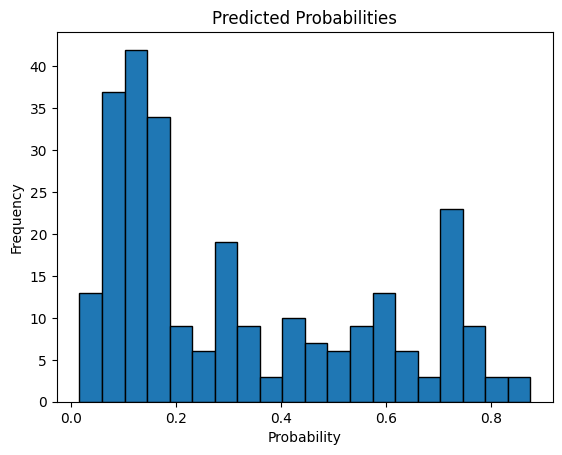

In [21]:
import matplotlib.pyplot as plt

# Get predicted probabilities
pred_probs = model.predict(eval_dataset)  # This will return probabilities

# Convert to a Pandas Series
probs = pd.Series(pred_probs.flatten())  # Flatten in case of single output

# Plot the predicted probabilities
probs.plot(kind='hist', bins=20, title='Predicted Probabilities', edgecolor='black')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()


(0.0, 1.05)

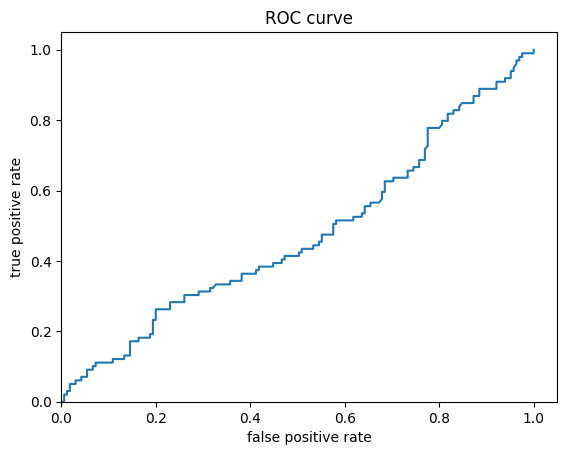

In [22]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)